<a href="https://colab.research.google.com/github/Prarthana-Poojara/Dog-Breed-prediction/blob/master/Dover_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to end multi-class Dog Breed Classification !

This notebook builds an end to end multi class dog breed image classifier using kaggel's dataset . 

Here we'll be using some deep learning / Transfer learning techniques to classify 120 different drog breeds. 


In [73]:
## checking if our workspace is ready ! 
import tensorflow as tf 
import tensorflow_hub as hub 
print("TF version", tf.__version__)
print("TF hub version",hub.__version__)

# checking the availablity for GPU 

print("GPU available"if tf.config.list_physical_devices("GPU") else "GPU not available!")

TF version 2.2.0
TF hub version 0.8.0
GPU available


## 1. Collecting our data 

In [74]:
import pandas as pd 
labels= pd.read_csv("/content/drive/My Drive/Dog-Breed-Project/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [75]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,b23af128a502079098556ca7ea2f981e,scottish_deerhound
freq,1,126


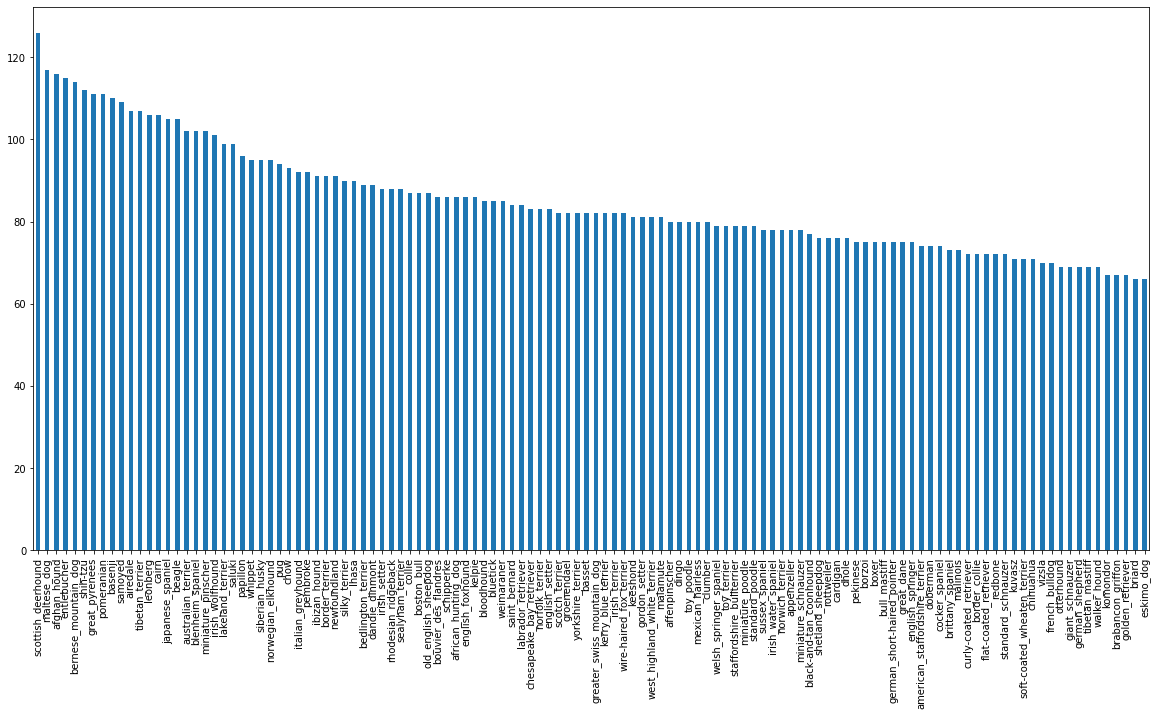

In [76]:
# how many images are there of each breed ? 
labels["breed"].value_counts().plot.bar(figsize=(20,10));

In [77]:
labels["breed"].value_counts().median()

82.0

In [78]:
### Create pathnames from image IDs 
##i.e concatinating images in the training data with their respective labels.

filename = ["drive/My Drive/Dog-Breed-Project/train/"+ fname + ".jpg" for fname in labels["id"]]

filename[:10]

['drive/My Drive/Dog-Breed-Project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog-Breed-Project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog-Breed-Project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog-Breed-Project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog-Breed-Project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog-Breed-Project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog-Breed-Project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog-Breed-Project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog-Breed-Project/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog-Breed-Project/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [79]:
# checking if the number of images n filename matches the actual number of images 
import os 
if len(os.listdir("drive/My Drive/Dog-Breed-Project/train/"))==len(filename):
  print("The number of images are equal")
else:
  print("The number of images are not equal.")

The number of images are equal


In [80]:
# lets manipulate the labels !
# converting labels into a numpy array!
import numpy as np 
labels=np.array(labels["breed"])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [81]:
len(labels)

10222

In [82]:
unique_breeds=np.unique(labels)
print(len(unique_breeds))

120


In [83]:
# Turning labels into array of booleans 
bool_labels= [label==unique_breeds for label in labels ]
bool_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [84]:
len(bool_labels)

10222

##2. Creating Our own Validation set! 


In [85]:
# lets set up x and y variables 

x = filename
y = bool_labels

In [86]:
len(filename)

10222

We're going to start experimenting with ~ 1000 images and increase it as we need 

In [87]:
NUM_IMAGES=1000 #@param{type:"slider",min:1000, max:10000, step:1000}

In [88]:
# lets split our data into train and validation data sets 
from sklearn.model_selection import train_test_split

#split the into training and validation data sets of total size NUM_IMAGES 
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)
 


In [89]:
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [90]:
x_train[:2],y_train[:2]

(['drive/My Drive/Dog-Breed-Project/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog-Breed-Project/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

## 3. Preprocessing Images 

To pre-process the images , we're going to create a function which does a few things :

1. take an image filepath as input . 

2. Use tensorflow to read the file and save it into a variable. 

3. Turn our image (jpeg) into Tensors . 

4. Normalize our image (convert colour channel values from 0-255 to 0-1).

5. Resize the image to (224,224)

6. Return the modified image 

In [91]:
## define the image size 
IMG_SIZE=224

## create a finction for image preprocessing 

def process_image (image_path,img_size=IMG_SIZE):
  """
  Takes the image path as the input and preprocess the image .
  This then returns the modified image.
  
  """
  #read in an image file 
  image=tf.io.read_file(image_path)
  #Turn the jpeg image into a numerical tensor with 3 colour channels (RGB)
  image=tf.image.decode_jpeg(image,channels=3)
  #Normalize the image from 0-255 to 0-1
  image=tf.image.convert_image_dtype(image,tf.float32)
  # resize the image to (224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image 
  
  




## 4. Turning our data into Batches 

If we're trying to process 10,000+ images in one go , they all might not fit into the memory which can lead to poor accuracy . Hence we convert them into batches of 32 and process them one batch at a time . 

In order to effectively use tensorflow, we need our data in the form of tuples . which look like this :
(image, label)

In [92]:
# creating a simple function to return a tuple(img,label)

def get_image_label(image_path,label):
  """
  Takes an image filepath and its associated label, processes the image and returns 
  a tuple. 
  """
  image = process_image(image_path)
  return image,label 

In [93]:
# Demo of the above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now that we've gotten a way to turn our data into tuples lets create a function to turn all our data (x&y)
into batches 

In [94]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [95]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


## 5. Build a model 

Before we build our model , there are a few things that we need to define :

1) input shape 

2) output shape 

3) URL of the model we want to use from TensorFlow Hub:

https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [96]:
# input shape 
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]
# output shape 
OUTPUT_SHAPE = len(unique_breeds)

# set up model URL from tensorflow hub 
MODEL_URL= "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now that we have our input , output and model url setup, lets put them together in a keras deep learning model .

Knowing this , lets create a function which :

1. Defines the keras model in a sequential fashion 

2. compiles the model

3. Builds the model 

4. Returns the model .



In [97]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with :", MODEL_URL)

  # setup the model layers 

  model=tf.keras.Sequential([
                             hub.KerasLayer(MODEL_URL),# layer 1
                             tf.keras.layers.Dense(units=OUTPUT_SHAPE,#layer2(output layer)
                                                   activation="softmax")
                        
  ])

  # compile the model 

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build the model 
  model.build(INPUT_SHAPE)

  return model 

In [98]:
model=create_model()
model.summary()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_5 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## 6. Training a model on a subset of data 

training on a subset to make sure everything is working 

In [99]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [100]:
# Build a function to train and return a trained model 

def train_model():
  """
  Trains a given model and returns a trained model.
  
  """
  model=create_model()

  # fit the model 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1)
  #return a fitted model 
  return model

In [32]:
#fit model to the data 
model=train_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 592s 24s/step - loss: 4.5451 - accuracy: 0.0775 - val_loss: 3.4262 - val_accuracy: 0.2150
Epoch 2/100
25/25 [==============================] - 6s 242ms/step - loss: 1.6348 - accuracy: 0.6988 - val_loss: 2.1773 - val_accuracy: 0.5400
Epoch 3/100
25/25 [==============================] - 6s 239ms/step - loss: 0.5656 - accuracy: 0.9413 - val_loss: 1.6547 - val_accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 6s 242ms/step - loss: 0.2542 - accuracy: 0.9900 - val_loss: 1.4958 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 6s 243ms/step - loss: 0.1460 - accuracy: 0.9962 - val_loss: 1.4227 - val_accuracy: 0.6700
Epoch 6/100
25/25 [==============================] - 6s 238ms/step - loss: 0.1005 - accuracy: 1.0000 - val_loss: 1.3648 - val_accuracy: 0.6700
Epoch 7/100
25/25 [=============================

## 7. Training on full dataset 

Now that this model didnt show any errors , we'll train a new model on the full data . 

In [114]:
len(x),len(y)

(10222, 10222)

In [115]:
#create batches with full dataset 
full_data=create_data_batches(x,y)

Creating training data batches...


In [ ]:
# creating a new model and fitting it on the entire training data 
full_model=create_model()
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS)

In [103]:
import os 
import datetime
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog-Breed-Project/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [104]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [48]:
save_model(full_model, suffix="complete-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog-Breed-Project/models/20200731-13051596200714-complete-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog-Breed-Project/models/20200731-13051596200714-complete-image-set-mobilenetv2-Adam.h5'

## 8. Making predictions on test data 

In [105]:
# Load test image filenames
test_path = "/content/drive/My Drive/Dog-Breed-Project/test"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/My Drive/Dog-Breed-Project/testf50e3cf5abd93afce432348daa6c4789.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf4db24d71e6f3100614eb4543f98394f.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf4fa65b062607d69c98f16cb625d5915.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf599f4d08388e69960e17234ebd0beba.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf5b7603797d8a92d5b7b52d073891347.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf4e1d93f8d4f389547d69a5cd468e49d.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf4a3d9cf1909fb5d894ff5d5121af9b0.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf4eb6450497df847ef1012d61d869007.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf47cd43251c741ee459c688955c41f29.jpg',
 '/content/drive/My Drive/Dog-Breed-Project/testf592d6ca12a9d99c18f26260c3eb148a.jpg']

In [106]:
len(test_filenames)

10357

In [107]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [111]:
loaded_full_model=load_model("drive/My Drive/Dog-Breed-Project/models/20200731-13051596200714-complete-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog-Breed-Project/models/20200731-13051596200714-complete-image-set-mobilenetv2-Adam.h5


In [119]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

NotFoundError: ignored